In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [20]:
dataset = pd.read_csv('SampleSuperstore.csv')
data = dataset
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [21]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [22]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [23]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [24]:
profit = data['Profit']
data = data.drop(['Profit','Country'], axis = 1)

In [25]:
features_with_na = [features for  features in data.columns if data[features].isnull().sum()>1 ]
features_with_na

[]

In [26]:
postal_code = data['Postal Code']
data = data.drop('Postal Code', axis = 1)

In [27]:
numerical_features = [features for features in data.columns if data[features].dtype != 'O' ]
data[numerical_features].head()
# data[numerical_features] = (data[numerical_features] - np.min(data[numerical_features]))/(np.max(data[numerical_features])-np.min(data[numerical_features]))

,Sales,Quantity,Discount
0,261.9600,2,0.00
1,731.9400,3,0.00
2,14.6200,2,0.00
3,957.5775,5,0.45
4,22.3680,2,0.20


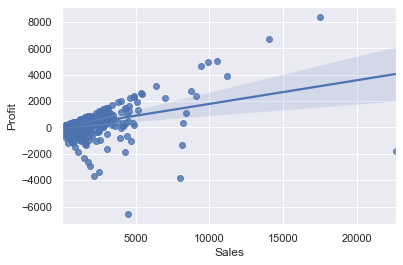

In [50]:
sns.regplot(data['Sales'], profit)

In [36]:
categorical_features = [features for features in data.columns if data[features].dtype == 'O']
data[categorical_features].head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage


In [37]:
for feature in categorical_features:
    print(feature , ' || no of unique features: {}'.format(len(data[feature].unique())))

Ship Mode  || no of unique features: 4
Segment  || no of unique features: 3
City  || no of unique features: 531
State  || no of unique features: 49
Region  || no of unique features: 4
Category  || no of unique features: 3
Sub-Category  || no of unique features: 17


<ipython-input-48-7a3c886d98db>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()


<Figure size 1800x1296 with 0 Axes>

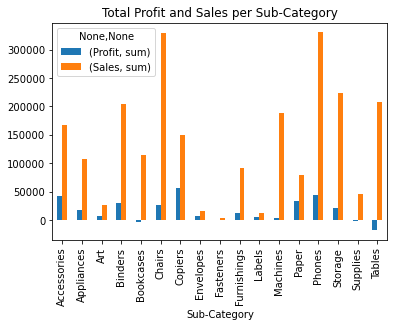

In [48]:
plt.figure(figsize=(25,18))
dataset.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

In [ ]:
sns